In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("whitegrid")
sns.set_palette("muted")

In [3]:
from datetime import datetime, date, time


In [4]:
df=pd.read_csv('archive/datatran2018.csv',encoding="ISO-8859-1",sep=";")
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,99973.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE,Condutor Dormindo,Saída de leito carroçável,...,4,1,0,4,1,-22.469370,-44.447050,SR-RJ,DEL5/7,UOP03/RJ
1,99976.0,2018-01-01,segunda-feira,00:40:00,SC,282.0,"0,4",FLORIANOPOLIS,Não guardar distância de segurança,Colisão traseira,...,2,1,0,2,2,-27.599717,-48.575657,SR-SC,DEL8/1,UOP01/SC
2,99977.0,2018-01-01,segunda-feira,00:30:00,RJ,493.0,1,ITABORAI,Ultrapassagem Indevida,Colisão frontal,...,0,3,1,1,3,-22.763901,-42.927532,SR-RJ,DEL5/4,UOP02/RJ
3,99981.0,2018-01-01,segunda-feira,01:15:00,RS,386.0,134,SARANDI,Ingestão de Álcool,Colisão transversal,...,0,2,0,0,2,-27.953636,-52.916374,SR-RS,DEL9/14,UOP01/RS
4,99982.0,2018-01-01,segunda-feira,00:20:00,RS,293.0,"151,7",CANDIOTA,Falta de Atenção à Condução,Saída de leito carroçável,...,1,0,0,1,1,-31.395214,-53.783912,SR-RS,DEL9/11,UOP03/RS


In [5]:
#Importando Dados

In [6]:
columns_to_read = ["id",
                   "data_inversa",
                   "horario",
                   "uf",                                
                   "br",              
                    "km",                                
                    "municipio",                         
                    "causa_acidente",                    
                    "tipo_acidente",                     
                    "classificacao_acidente",            
                    "fase_dia",                          
                    "sentido_via",                       
                    "condicao_metereologica",            
                    "tipo_pista",                        
                    "tracado_via",                       
                    "uso_solo",                                            
                    "pessoas",                            
                    "mortos",                             
                    "feridos_leves",                      
                    "feridos_graves",                     
                    "ilesos",                             
                    "ignorados",                          
                    "feridos",                            
                    "veiculos"] 

In [7]:
datatran2018 = pd.read_csv('archive/datatran2018.csv', sep = ';', decimal=",", encoding = "ISO-8859-1", usecols=columns_to_read)


In [8]:
#Reduzindo uso de memória

In [9]:
acidentes = pd.concat([datatran2018], sort=False, ignore_index=True)

In [10]:
to_delete = [datatran2018]
del datatran2018
del to_delete
acidentes.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69206 entries, 0 to 69205
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      69206 non-null  float64
 1   data_inversa            69206 non-null  object 
 2   horario                 69206 non-null  object 
 3   uf                      69206 non-null  object 
 4   br                      69092 non-null  float64
 5   km                      69092 non-null  float64
 6   municipio               69206 non-null  object 
 7   causa_acidente          69206 non-null  object 
 8   tipo_acidente           69206 non-null  object 
 9   classificacao_acidente  69206 non-null  object 
 10  fase_dia                69206 non-null  object 
 11  sentido_via             69206 non-null  object 
 12  condicao_metereologica  69206 non-null  object 
 13  tipo_pista              69206 non-null  object 
 14  tracado_via             69206 non-null

In [11]:
acidentes.id = acidentes.id.astype('int32')
acidentes.pessoas = acidentes.pessoas.astype('uint8')
acidentes.mortos = acidentes.mortos.astype('uint8')
acidentes.feridos_leves = acidentes.feridos_leves.astype('uint8')
acidentes.feridos_graves = acidentes.feridos_graves.astype('uint8')
acidentes.ilesos = acidentes.ilesos.astype('uint8')
acidentes.ignorados = acidentes.ignorados.astype('uint8')
acidentes.feridos = acidentes.feridos.astype('uint8')
acidentes.veiculos = acidentes.veiculos.astype('uint8')
acidentes.uf = acidentes.uf.astype('category')
acidentes.br = acidentes.br.astype('category')
acidentes.municipio = acidentes.municipio.astype('category')
acidentes.causa_acidente = acidentes.causa_acidente.astype('category')
acidentes.tipo_acidente = acidentes.tipo_acidente.astype('category')
acidentes.classificacao_acidente = acidentes.classificacao_acidente.astype('category')
acidentes.fase_dia = acidentes.fase_dia.astype('category')
acidentes.sentido_via = acidentes.sentido_via.astype('category')
acidentes.condicao_metereologica = acidentes.condicao_metereologica.astype('category')
acidentes.tipo_pista = acidentes.tipo_pista.astype('category')
acidentes.tracado_via = acidentes.tracado_via.astype('category')
acidentes.uso_solo = acidentes.uso_solo.astype('category')

In [12]:
acidentes['data_hora'] = acidentes['data_inversa'].map(str) + ' ' + acidentes['horario']
acidentes['data_hora'] = pd.to_datetime(acidentes['data_hora'])
acidentes['ano'] = acidentes['data_hora'].dt.year
acidentes['mes'] = acidentes['data_hora'].dt.month
acidentes['hora'] = acidentes['data_hora'].dt.hour
acidentes.drop(['data_inversa', 'horario'], axis=1, inplace = True)


In [13]:
acidentes = acidentes.dropna()


In [14]:
acidentes.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
Index: 69092 entries, 0 to 69205
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      69092 non-null  int32         
 1   uf                      69092 non-null  category      
 2   br                      69092 non-null  category      
 3   km                      69092 non-null  float64       
 4   municipio               69092 non-null  category      
 5   causa_acidente          69092 non-null  category      
 6   tipo_acidente           69092 non-null  category      
 7   classificacao_acidente  69092 non-null  category      
 8   fase_dia                69092 non-null  category      
 9   sentido_via             69092 non-null  category      
 10  condicao_metereologica  69092 non-null  category      
 11  tipo_pista              69092 non-null  category      
 12  tracado_via             69092 non-null  category   

In [15]:
#Removendo espaços de strings e padronizando lowercase

In [16]:
acidentes['municipio'] = acidentes['municipio'].str.rstrip()
acidentes['causa_acidente'] = acidentes['causa_acidente'].str.rstrip()
acidentes['tipo_acidente'] = acidentes['tipo_acidente'].str.rstrip()
acidentes['classificacao_acidente'] = acidentes['classificacao_acidente'].str.rstrip()
acidentes['fase_dia'] = acidentes['fase_dia'].str.rstrip()
acidentes['sentido_via'] = acidentes['sentido_via'].str.rstrip()
acidentes['condicao_metereologica'] = acidentes['condicao_metereologica'].str.rstrip()
acidentes['tipo_pista'] = acidentes['tipo_pista'].str.rstrip()
acidentes['tracado_via'] = acidentes['tracado_via'].str.rstrip()
acidentes['uso_solo'] = acidentes['uso_solo'].str.rstrip()
acidentes['uf'] = acidentes['uf'].str.upper()
acidentes['municipio'] = acidentes['municipio'].str.lower()
acidentes['causa_acidente'] = acidentes['causa_acidente'].str.lower()
acidentes['classificacao_acidente'] = acidentes['classificacao_acidente'].str.lower()
acidentes['fase_dia'] = acidentes['fase_dia'].str.lower()
acidentes['sentido_via'] = acidentes['sentido_via'].str.lower()
acidentes['tipo_pista'] = acidentes['tipo_pista'].str.lower()
acidentes['tracado_via'] = acidentes['tracado_via'].str.lower()
acidentes['uso_solo'] = acidentes['uso_solo'].str.lower()

In [17]:
#Padronizando categorias

In [18]:
#A sorted()função retorna uma lista classificada do objeto iterável especificado.
#Você pode especificar a ordem crescente ou decrescente. 
#As strings são classificadas em ordem alfabética e os números são classificados numericamente
sorted(acidentes.causa_acidente.unique())

['agressão externa',
 'animais na pista',
 'avarias e/ou desgaste excessivo no pneu',
 'carga excessiva e/ou mal acondicionada',
 'condutor dormindo',
 'defeito mecânico no veículo',
 'defeito na via',
 'deficiência ou não acionamento do sistema de iluminação/sinalização do veículo',
 'desobediência às normas de trânsito pelo condutor',
 'desobediência às normas de trânsito pelo pedestre',
 'falta de atenção do pedestre',
 'falta de atenção à condução',
 'fenômenos da natureza',
 'ingestão de substâncias psicoativas',
 'ingestão de álcool',
 'ingestão de álcool e/ou substâncias psicoativas pelo pedestre',
 'mal súbito',
 'não guardar distância de segurança',
 'objeto estático sobre o leito carroçável',
 'pista escorregadia',
 'restrição de visibilidade',
 'sinalização da via insuficiente ou inadequada',
 'ultrapassagem indevida',
 'velocidade incompatível']

In [19]:
mapa_causa_acidente = {'(null)' : '(null)',
    'agressão externa' : 'agressão externa',
 'animais na pista' : 'animais na pista',
 'avarias e/ou desgaste excessivo no pneu' : 'avarias e/ou desgaste excessivo no pneu',
 'carga excessiva e/ou mal acondicionada' : 'carga excessiva e/ou mal acondicionada',
 'condutor dormindo' : 'condutor dormindo',
 'defeito mecânico em veículo' : 'defeito mecânico no veículo',
 'defeito mecânico no veículo' : 'defeito mecânico no veículo',
 'defeito na via' : 'defeito na via',
 'deficiência ou não acionamento do sistema de iluminação/sinalização do veículo' : 'deficiência ou não acionamento do sistema de iluminação/sinalização do veículo',
 'desobediência à sinalização' : 'desobediência à sinalização',
 'desobediência às normas de trânsito pelo condutor' : 'desobediência às normas de trânsito pelo condutor',
 'desobediência às normas de trânsito pelo pedestre' : 'desobediência às normas de trânsito pelo pedestre',
 'dormindo' : 'condutor dormindo',
 'falta de atenção' : 'falta de atenção à condução',
 'falta de atenção do pedestre' : 'falta de atenção do pedestre',
 'falta de atenção à condução' : 'falta de atenção à condução',
 'fenômenos da natureza' : 'fenômenos da natureza',
 'ingestão de substâncias psicoativas' : 'ingestão de substâncias psicoativas',
 'ingestão de álcool' : 'ingestão de álcool',
 'ingestão de álcool e/ou substâncias psicoativas pelo pedestre' : 'ingestão de álcool e/ou substâncias psicoativas pelo pedestre',
 'mal súbito' : 'mal súbito',
 'não guardar distância de segurança' : 'não guardar distância de segurança',
 'objeto estático sobre o leito carroçável' : 'objeto estático sobre o leito carroçável',
 'outras' : 'outras',
 'pista escorregadia' : 'pista escorregadia',
 'restrição de visibilidade' : 'restrição de visibilidade',
 'sinalização da via insuficiente ou inadequada' : 'sinalização da via insuficiente ou inadequada',
 'ultrapassagem indevida' : 'ultrapassagem indevida',
 'velocidade incompatível' : 'velocidade incompatível'}
acidentes.causa_acidente = acidentes.causa_acidente.map(mapa_causa_acidente)

In [20]:
sorted(acidentes.tipo_acidente.unique())

['Atropelamento de Animal',
 'Atropelamento de Pedestre',
 'Capotamento',
 'Colisão com objeto em movimento',
 'Colisão com objeto estático',
 'Colisão frontal',
 'Colisão lateral',
 'Colisão transversal',
 'Colisão traseira',
 'Danos eventuais',
 'Derramamento de carga',
 'Engavetamento',
 'Incêndio',
 'Queda de ocupante de veículo',
 'Saída de leito carroçável',
 'Tombamento']

In [21]:
mapa_tipo_acidente = {'Atropelamento de Animal' : 'Atropelamento de animal',
 'Atropelamento de Pedestre' : 'Atropelamento de pedestre',
 'Atropelamento de animal' : 'Atropelamento de animal',
 'Atropelamento de pessoa' : 'Atropelamento de pedestre',
 'Capotamento' : 'Capotamento',
 'Colisão Transversal' : 'Colisão transversal',
 'Colisão com bicicleta' : 'Colisão com bicicleta',
 'Colisão com objeto em movimento' : 'Colisão com objeto em movimento',
 'Colisão com objeto estático' : 'Colisão com objeto estático',
 'Colisão com objeto fixo' : 'Colisão com objeto estático',
 'Colisão com objeto móvel' : 'Colisão com objeto em movimento',
 'Colisão frontal' : 'Colisão frontal',
 'Colisão lateral' : 'Colisão lateral',
 'Colisão transversal' : 'Colisão transversal',
 'Colisão traseira' : 'Colisão traseira',
 'Danos Eventuais' : 'Danos eventuais',
 'Danos eventuais' : 'Danos eventuais',
 'Derramamento de Carga' : 'Derramamento de carga',
 'Derramamento de carga' : 'Derramamento de carga',
 'Engavetamento' : 'Engavetamento',
 'Incêndio' : 'Incêndio',
 'Queda de motocicleta / bicicleta / veículo' : 'Queda de ocupante de veículo',
 'Queda de ocupante de veículo' : 'Queda de ocupante de veículo',
 'Saída de Pista' : 'Saída de pista',
 'Saída de leito carroçável' : 'Saída de pista',
 'Tombamento' : 'Tombamento'}
acidentes.tipo_acidente = acidentes.tipo_acidente.map(mapa_tipo_acidente)

In [22]:
acidentes.condicao_metereologica.unique()


array(['Nublado', 'Céu Claro', 'Chuva', 'Ignorado', 'Vento', 'Sol',
       'Garoa/Chuvisco', 'Nevoeiro/Neblina', 'Granizo'], dtype=object)

In [23]:
apa_condicao_metereologica = {'Ceu Claro' : 'Céu Claro',
                               'Chuva' : 'Chuva',
                               'Nublado' : 'Nublado',
                               'Sol' : 'Sol',
                               'Nevoeiro/neblina' : 'Nevoeiro/Neblina',
                               'Ignorada' : 'Ignorada',
                               'Vento' : 'Vento',
                               'Granizo' : 'Granizo',
                               '(null)' : '(null)',
                               'Neve' : 'Neve',
                               'Garoa/Chuvisco' : 'Garoa/Chuvisco',
                               'Céu Claro' : 'Céu Claro',
                               'Ignorado' : 'Ignorada',
                               'Nevoeiro/Neblina' : 'Nevoeiro/Neblina'}

### filtrando campo maior

In [26]:
# Remover espaços em branco e garantir que as colunas estejam em letras maiúsculas
acidentes['municipio'] = acidentes['municipio'].str.strip().str.upper()
acidentes['uf'] = acidentes['uf'].str.strip().str.upper()

# Agora aplicar o filtro corretamente
filtro_campo_maior = (acidentes['municipio'] == 'CAMPO MAIOR') & (acidentes['uf'] == 'PI')
acidentes_campo_maior = acidentes[filtro_campo_maior]

# Verificar se o filtro trouxe resultados
print(acidentes_campo_maior.head())

          id  uf     br     km    municipio  \
2557  102975  PI  343.0  263.1  CAMPO MAIOR   
2957  103431  PI  343.0  287.4  CAMPO MAIOR   
4590  105325  PI  343.0  267.0  CAMPO MAIOR   
5541  106422  PI  343.0  273.0  CAMPO MAIOR   
5694  106594  PI  343.0  282.5  CAMPO MAIOR   

                          causa_acidente                 tipo_acidente  \
2557  não guardar distância de segurança              Colisão traseira   
2957                    animais na pista  Queda de ocupante de veículo   
4590         falta de atenção à condução               Colisão frontal   
5541                    animais na pista       Atropelamento de animal   
5694         falta de atenção à condução           Colisão transversal   

     classificacao_acidente     fase_dia  sentido_via  ... feridos_leves  \
2557            sem vítimas    pleno dia  decrescente  ...             0   
2957    com vítimas feridas    pleno dia    crescente  ...             1   
4590    com vítimas feridas  plena noite    

In [27]:
acidentes_campo_maior

,id,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,...,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,data_hora,ano,mes,hora
2557,102975,PI,343.0,263.1,CAMPO MAIOR,não guardar distância de segurança,Colisão traseira,sem vítimas,pleno dia,decrescente,...,0,0,2,0,0,2,2018-01-12 16:20:00,2018,1,16
2957,103431,PI,343.0,287.4,CAMPO MAIOR,animais na pista,Queda de ocupante de veículo,com vítimas feridas,pleno dia,crescente,...,1,0,0,0,1,1,2018-01-14 10:10:00,2018,1,10
4590,105325,PI,343.0,267.0,CAMPO MAIOR,falta de atenção à condução,Colisão frontal,com vítimas feridas,plena noite,crescente,...,0,2,1,0,2,2,2018-01-21 21:35:00,2018,1,21
5541,106422,PI,343.0,273.0,CAMPO MAIOR,animais na pista,Atropelamento de animal,sem vítimas,plena noite,decrescente,...,0,0,1,0,0,1,2018-01-26 22:10:00,2018,1,22
5694,106594,PI,343.0,282.5,CAMPO MAIOR,falta de atenção à condução,Colisão transversal,com vítimas fatais,pleno dia,crescente,...,0,0,1,0,0,2,2018-01-27 15:15:00,2018,1,15
8071,109344,PI,343.0,264.3,CAMPO MAIOR,falta de atenção à condução,Colisão lateral,com vítimas feridas,pleno dia,decrescente,...,2,0,2,0,2,2,2018-02-07 09:15:00,2018,2,9
8536,109881,PI,343.0,264.5,CAMPO MAIOR,falta de atenção à condução,Colisão lateral,com vítimas feridas,pleno dia,crescente,...,3,0,0,0,3,2,2018-02-09 14:00:00,2018,2,14
10599,112198,PI,343.0,275.0,CAMPO MAIOR,defeito na via,Queda de ocupante de veículo,com vítimas feridas,plena noite,decrescente,...,1,1,0,0,2,1,2018-02-18 20:15:00,2018,2,20
15652,118228,PI,343.0,246.0,CAMPO MAIOR,defeito na via,Colisão com objeto estático,com vítimas feridas,pleno dia,crescente,...,1,0,0,0,1,1,2018-03-14 14:00:00,2018,3,14
17428,120253,PI,343.0,264.6,CAMPO MAIOR,desobediência às normas de trânsito pelo condutor,Colisão transversal,com vítimas feridas,pleno dia,decrescente,...,0,1,0,1,1,2,2018-03-23 07:00:00,2018,3,7


In [28]:
# Filtrando os acidentes com mortos ou feridos graves na cidade de Campo Maior/PI
selecao = (acidentes_campo_maior['mortos'] != 0) | (acidentes_campo_maior['feridos_graves'] != 0)
acidentes_graves_campo_maior = acidentes_campo_maior[selecao]

In [29]:
# Agrupando por ano e mês para Campo Maior
df_ano_mes_acidentes_graves_cm = acidentes_graves_campo_maior.groupby(by=['ano', 'mes'])['mes'].count().reset_index(name='Quantidade')
df_ano_mes_acidentes_graves_cm['ano_mes'] = df_ano_mes_acidentes_graves_cm['ano'].map(str) + "-" + df_ano_mes_acidentes_graves_cm['mes'].map(str)


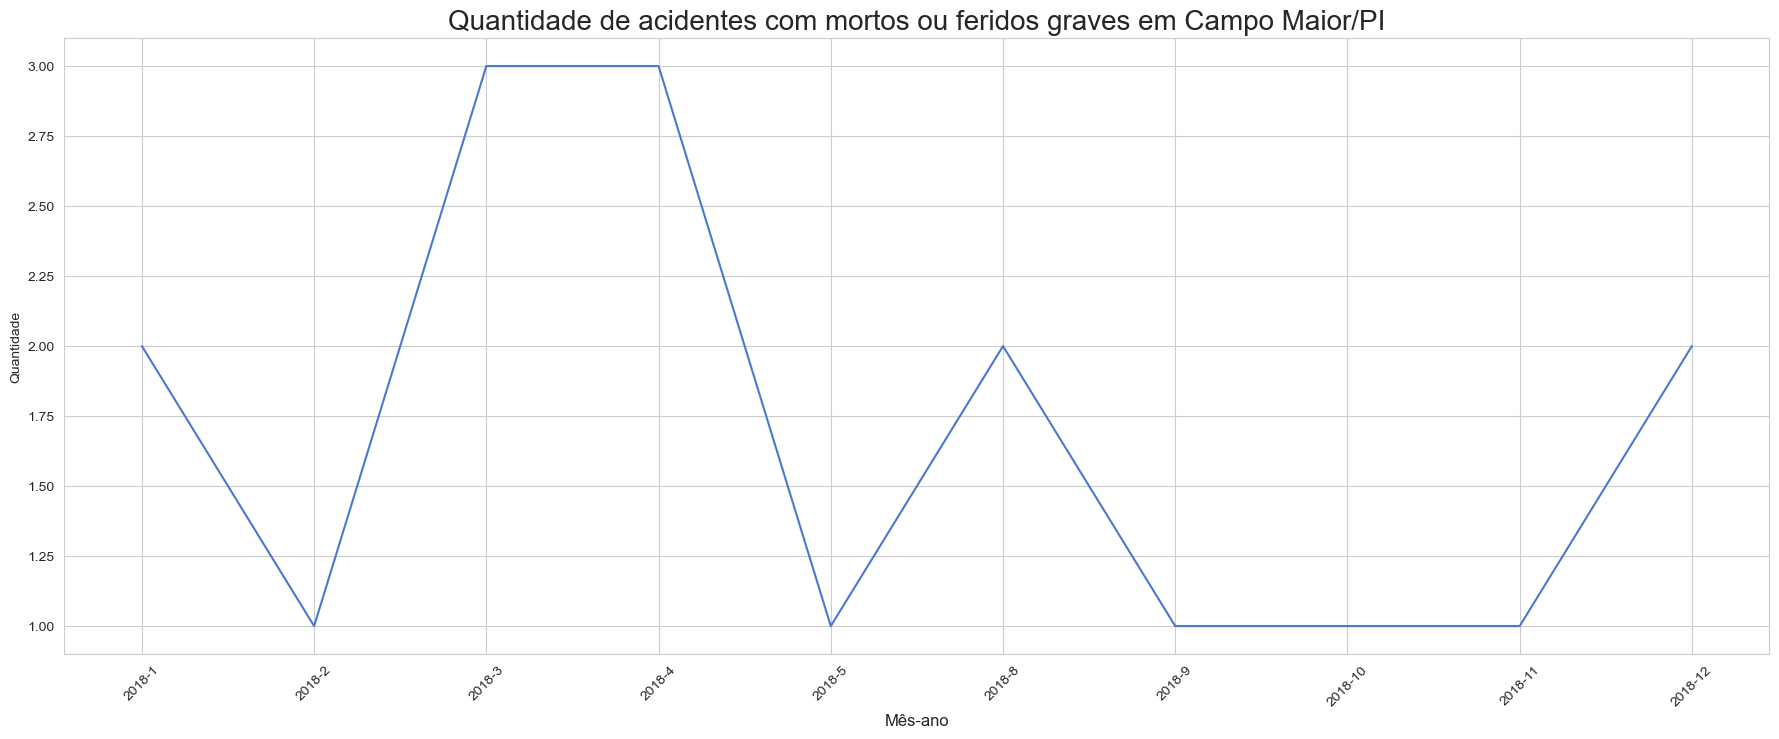

In [33]:
# Plotando gráfico de linha para tendência em Campo Maior
ax = sns.lineplot(x='ano_mes', y='Quantidade', data=df_ano_mes_acidentes_graves_cm)
ax.figure.set_size_inches(22,8)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_title("Quantidade de acidentes com mortos ou feridos graves em Campo Maior/PI", fontsize=20)
ax.set_xlabel('Mês-ano', fontsize=12)
plt.xticks(rotation=45)
plt.show()

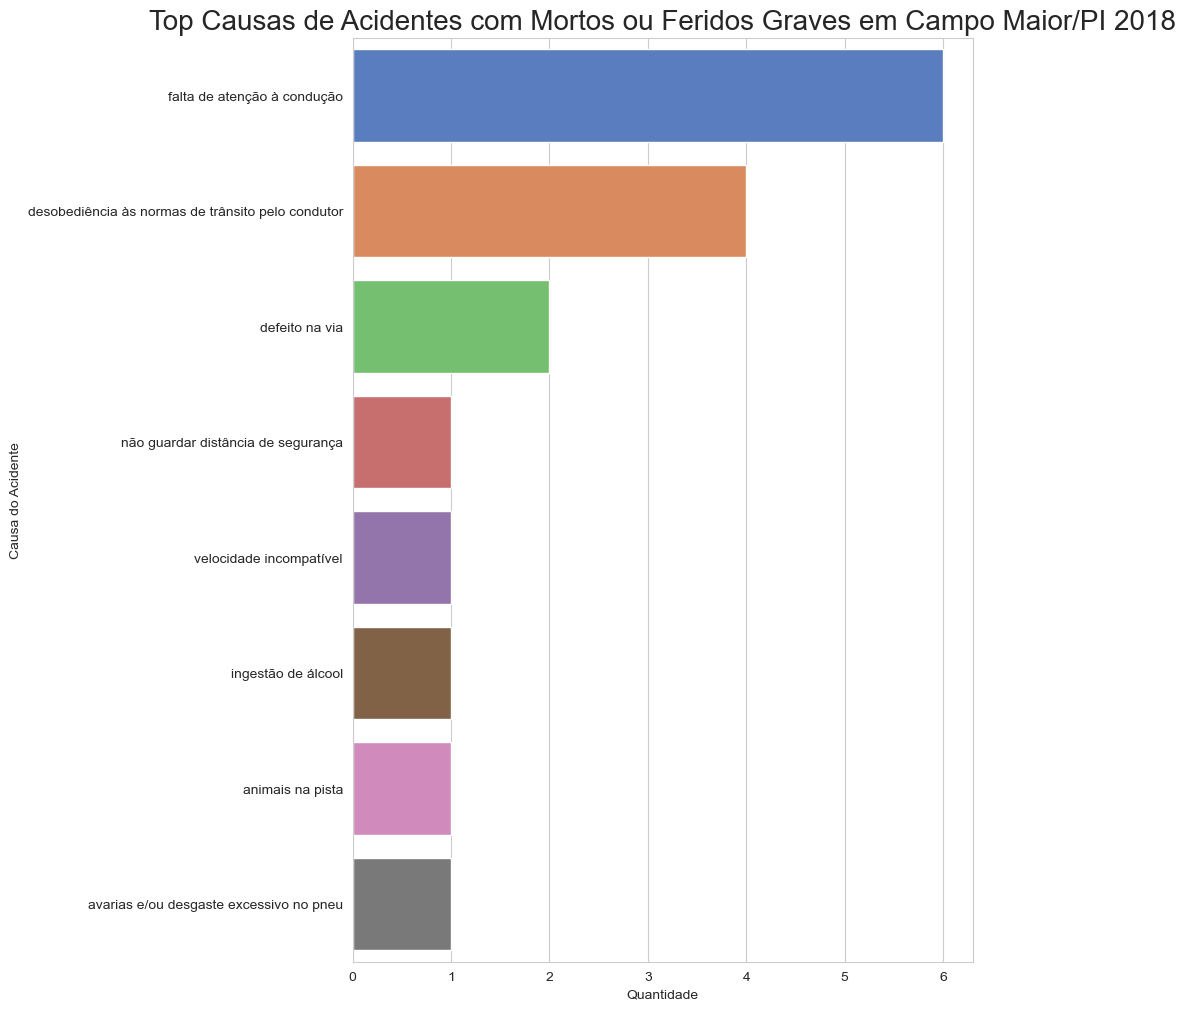

In [34]:
# Causas de acidentes graves em Campo Maior
ax = sns.barplot(x=acidentes_graves_campo_maior['causa_acidente'].value_counts().values,
                 y=acidentes_graves_campo_maior['causa_acidente'].value_counts().index)

ax.set_title("Top Causas de Acidentes com Mortos ou Feridos Graves em Campo Maior/PI 2018", fontsize=20)
ax.set_xlabel('Quantidade')
ax.set_ylabel('Causa do Acidente')
ax.figure.set_size_inches(8,12)
plt.show()

In [35]:
# Filtrar os acidentes apenas no estado do Piauí
acidentes_piaui = acidentes[acidentes['uf'] == 'PI']

In [36]:
# Agrupar por rodovias federais (BR) no Piauí e contar o número de acidentes fatais
df_br_piaui_mortos = acidentes_piaui.groupby(by=['uf', 'br'])['mortos'].count().reset_index(name='Quantidade')


In [37]:
# Somar o total de mortos por BR no Piauí
df2 = acidentes_piaui.groupby(by=['uf', 'br'])['mortos'].sum().reset_index(name='Mortos')



In [38]:
# Juntar a quantidade de acidentes com o total de mortos por rodovia
df_br_piaui_mortos = df_br_piaui_mortos.join(df2['Mortos'])


In [39]:
# Calcular a taxa de mortos por 100 acidentes em cada rodovia federal do Piauí
df_br_piaui_mortos['Mortos por 100 acidentes'] = 100 * (df_br_piaui_mortos['Mortos'] / df_br_piaui_mortos['Quantidade'])


In [40]:
# Selecionar as 5 rodovias mais letais no Piauí
rodovias_mais_letais_piaui = df_br_piaui_mortos.nlargest(5, 'Mortos')


In [41]:
# Exibir o resultado
print(rodovias_mais_letais_piaui)

    uf     br  Quantidade  Mortos  Mortos por 100 acidentes
47  PI  343.0         628      55                  8.757962
42  PI  316.0         429      36                  8.391608
13  PI  135.0         126      28                 22.222222
68  PI  407.0          51      14                 27.450980
24  PI  230.0          63      11                 17.460317


In [42]:
selecao = (acidentes.mortos != 0) | (acidentes.feridos_graves !=0)
acidentes_com_mortos_ou_feridos_graves = acidentes[selecao]

In [43]:
# Filtrar os acidentes graves (com mortos ou feridos graves) no município de Campo Maior
acidentes_graves_campo_maior = acidentes_com_mortos_ou_feridos_graves[
    (acidentes_com_mortos_ou_feridos_graves['municipio'] == 'CAMPO MAIOR') & 
    (acidentes_com_mortos_ou_feridos_graves['uf'] == 'PI')
]

In [44]:
# Agrupar pelo horário do acidente (coluna 'hora') e somar o número de mortos em cada hora
df_hora_mortos_campo_maior = acidentes_graves_campo_maior.groupby(by=['hora'])['mortos'].sum().reset_index(name='mortos')

# Exibir o resultado
print(df_hora_mortos_campo_maior)


    hora  mortos
0      2       0
1      3       0
2      4       0
3      7       0
4      8       3
5     12       1
6     15       1
7     17       0
8     18       1
9     20       1
10    21       0


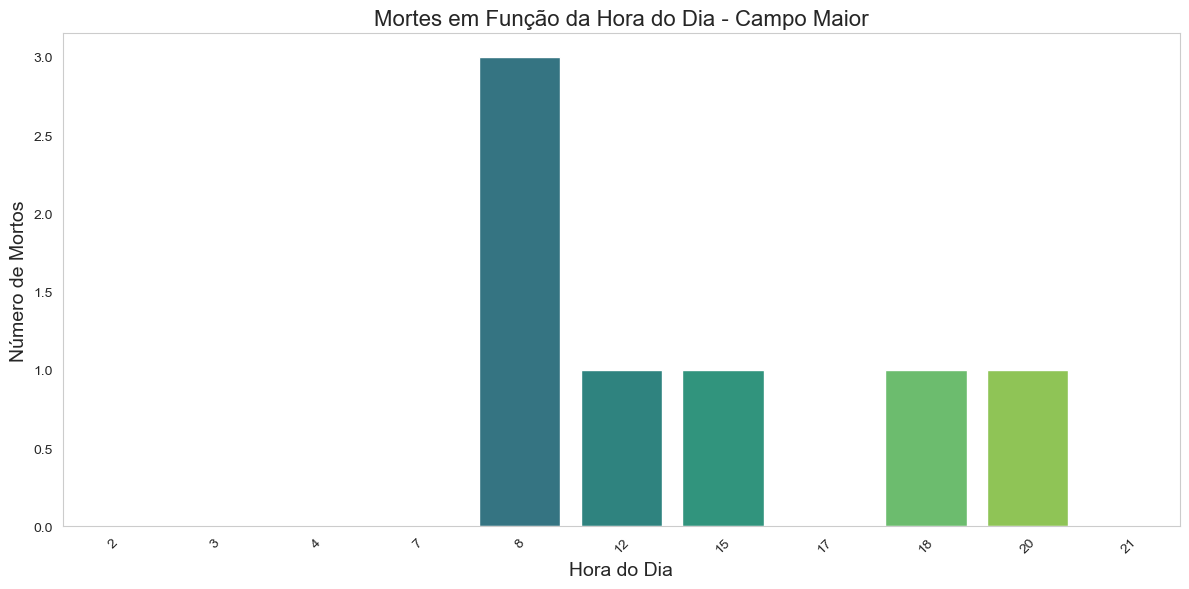

In [45]:
# Criar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='hora', y='mortos', data=df_hora_mortos_campo_maior, palette='viridis')
plt.title('Mortes em Função da Hora do Dia - Campo Maior', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Número de Mortos', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()
plt.show()